## Business Problem
As a marketing agency, our primary objective is to maximize the return on investment (ROI) for our clients' advertising campaigns. We have conducted two ad campaigns, one on Facebook and the other on AdWords, and we need to determine which platform yields better results in terms of clicks, conversions, and overall cost-effectiveness. By identifying the most effective platform, we can allocate our resources more efficiently and optimize our advertising strategies to deliver better outcomes for our clients. 

## Research Question
Which ad platform is more effective in terms of conversions, clicks, and overall cost-effectiveness?


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint

## Data Description
The dataset comprises a collection of data comparing the performance of two separate ad campaigns conducted throughout the year 2019. Specifically, the data covers a Facebook Ad campaign and an AdWords Ad campaign. For each day of the year 2019, there is a corresponding row in the dataset, resulting in a total of 365 lines of campaign data to analyze. The dataset includes various performance metrics for each ad campaign, providing insights into their effectiveness and efficiency over time.

**Key features included in the dataset are as follows:**

* Date: The date corresponding to each row of campaign data, ranging from January 1st, 2019, to December 31st, 2019.
* Ad Views: The number of times the ad was viewed.
* Ad Clicks: The number of clicks received on the ad.
* Ad Conversions: The number of conversions resulting from the ad.
* Cost per Ad: The cost associated with running the Facebook ad campaign.
* Click-Through Rate (CTR): The ratio of clicks to views, indicating the effectiveness of the ad in generating clicks.
* Conversion Rate: The ratio of conversions to clicks, reflecting the effectiveness of the ad in driving desired actions.
* Cost per Click (CPC): The average cost incurred per click on the ad.

In [2]:
# Loading the dataset
df = pd.read_excel(r"marketing_campaign.xlsx")

In [4]:
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,2023-01-01,FB_Jan,2116,18,8,126,0.0083,0.4273,7.14,AW_Jan,4984,59,5,234,0.0118,0.0840,3.30
1,2023-01-02,FB_Jan,3106,36,12,104,0.0115,0.3404,2.91,AW_Jan,4022,71,6,75,0.0177,0.0780,1.05
2,2023-01-03,FB_Jan,3105,26,8,102,0.0084,0.3145,3.89,AW_Jan,3863,44,4,141,0.0113,0.0959,3.23
3,2023-01-04,FB_Jan,1107,27,9,71,0.0245,0.3476,2.62,AW_Jan,3911,49,5,141,0.0126,0.1108,2.86
4,2023-01-05,FB_Jan,1317,15,7,78,0.0110,0.4759,5.38,AW_Jan,4070,55,7,133,0.0136,0.1222,2.40


In [5]:
df.shape

(365, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Date                                             365 non-null    datetime64[ns]
 1   Facebook Ad Campaign                             365 non-null    object        
 2   Facebook Ad Views                                365 non-null    int64         
 3   Facebook Ad Clicks                               365 non-null    int64         
 4   Facebook Ad Conversions                          365 non-null    int64         
 5   Cost per Facebook Ad                             365 non-null    int64         
 6   Facebook Click-Through Rate (Clicks / View)      365 non-null    float64       
 7   Facebook Conversion Rate (Conversions / Clicks)  365 non-null    float64       
 8   Facebook Cost per Click (Ad Cost / Click

In [8]:
df.describe()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2023-07-02 00:00:00,2179.687671,44.049315,11.742466,87.780822,0.022013,0.271533,2.187808,4717.19726,60.383562,5.980822,135.084932,0.012958,0.101844,2.377863
min,2023-01-01 00:00:00,1050.000000,15.000000,5.000000,34.000000,0.008300,0.214800,0.610000,3714.00000,31.000000,3.000000,73.000000,0.005700,0.061300,0.850000
25%,2023-04-02 00:00:00,1656.000000,35.000000,10.000000,63.000000,0.014900,0.238000,1.410000,4247.00000,49.000000,5.000000,110.000000,0.010300,0.077000,1.760000
50%,2023-07-02 00:00:00,2202.000000,43.000000,12.000000,88.000000,0.020000,0.267700,2.020000,4711.00000,60.000000,6.000000,135.000000,0.012900,0.099300,2.290000
75%,2023-10-01 00:00:00,2717.000000,54.000000,13.000000,111.000000,0.026700,0.289700,2.760000,5190.00000,73.000000,7.000000,162.000000,0.015200,0.120300,2.810000
max,2023-12-31 00:00:00,3320.000000,73.000000,19.000000,144.000000,0.053700,0.475900,7.140000,5760.00000,89.000000,9.000000,234.000000,0.022500,0.200600,5.650000
std,NaN,618.074639,12.140559,2.924786,28.263014,0.009332,0.041659,1.040820,561.11406,14.368225,1.628106,32.605550,0.003388,0.028874,0.856929


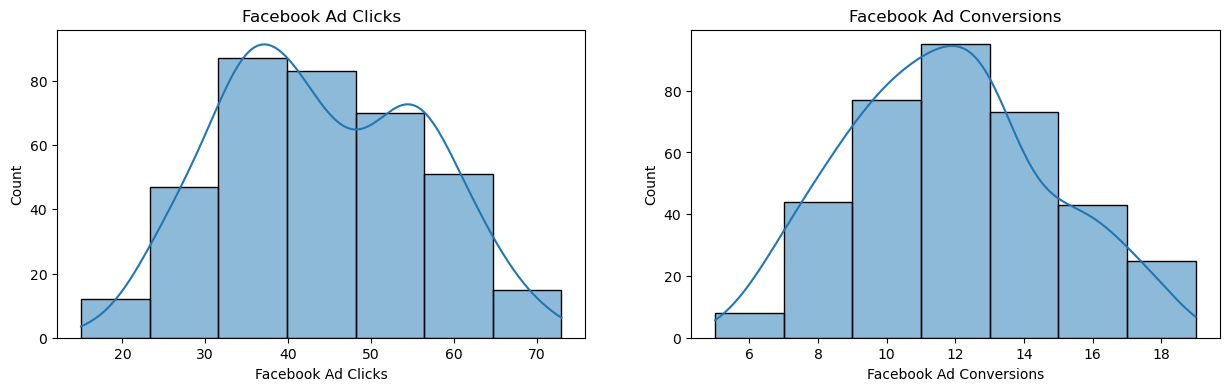

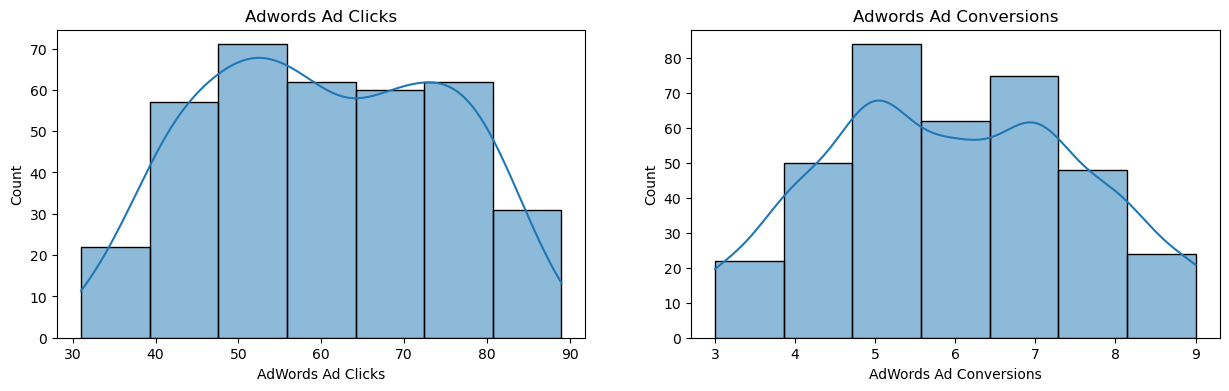

In [5]:
#distribution of the clicks and conversions
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title("Facebook Ad Clicks")
sns.histplot(df['Facebook Ad Clicks'], bins = 7, edgecolor='k',kde=True)
plt.subplot(122)
plt.title("Facebook Ad Conversions")
sns.histplot(df['Facebook Ad Conversions'], bins = 7, edgecolor='k',kde=True)
plt.show()

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title("Adwords Ad Clicks")
sns.histplot(df['AdWords Ad Clicks'], bins = 7, edgecolor='k',kde=True)
plt.subplot(122)
plt.title("Adwords Ad Conversions")
sns.histplot(df['AdWords Ad Conversions'], bins = 7, edgecolor='k',kde=True)
plt.show()



All the histogram are showing somewhat symmetrical shape. This symmetrical shape suggests that the number of clicks and conversions is relatively evenly distributed. In other words, there are not many clicks of conversions that are outfiers on either the high or low end. 

#### How frequently do we observe days with high numbers of conversations compared to days with low number of conversations

In [15]:
# categorizing the conversion rate into 4 categories
# less than 6 , 6-10 , 10-15, more than 15

def create_conversion_category(column):
    category = []
    for conversion in df[column]:
        if conversion < 6:
            category.append('less than 6')
        elif 6 <= conversion < 11:
            category.append('6 - 10')
        elif 11 <= conversion < 16:
            category.append('10 - 15')
        else:
            category.append('more than 15')
    return category

df['Facebook Conversion Category'] = create_conversion_category('Facebook Ad Conversions')
df['AdWords Conversion Category'] = create_conversion_category('AdWords Ad Conversions')

df[['Facebook Ad Conversions','Facebook Conversion Category','AdWords Ad Conversions','AdWords Conversion Category']].head()

,Facebook Ad Conversions,Facebook Conversion Category,AdWords Ad Conversions,AdWords Conversion Category
0,8,6 - 10,5,less than 6
1,12,10 - 15,6,6 - 10
2,8,6 - 10,4,less than 6
3,9,6 - 10,5,less than 6
4,7,6 - 10,7,6 - 10


In [18]:
df['Facebook Conversion Category'].value_counts()

Facebook Conversion Category
10 - 15         189
6 - 10          128
more than 15     47
less than 6       1
Name: count, dtype: int64

In [20]:
facebook = df['Facebook Conversion Category'].value_counts().reset_index().rename(columns = {'Facebook Conversion Category':'Conversion Category'})
facebook

,Conversion Category,count
0,10 - 15,189
1,6 - 10,128
2,more than 15,47
3,less than 6,1


In [21]:
adwords = df['AdWords Conversion Category'].value_counts().reset_index().rename(columns = {'AdWords Conversion Category':'Conversion Category'})
adwords

,Conversion Category,count
0,6 - 10,209
1,less than 6,156


In [33]:
category_df = pd.merge(facebook,adwords, on ='Conversion Category', how = 'outer').fillna(0)
category_df

,Conversion Category,count_x,count_y
0,10 - 15,189,0.0
1,6 - 10,128,209.0
2,more than 15,47,0.0
3,less than 6,1,156.0


In [34]:
category_df.rename(columns = {'count_x':'Facebook', 'count_y':'adwords'}, inplace = True)

In [35]:
category_df = category_df.iloc[[3,1,0,2]]
category_df

,Conversion Category,Facebook,adwords
3,less than 6,1,156.0
1,6 - 10,128,209.0
0,10 - 15,189,0.0
2,more than 15,47,0.0


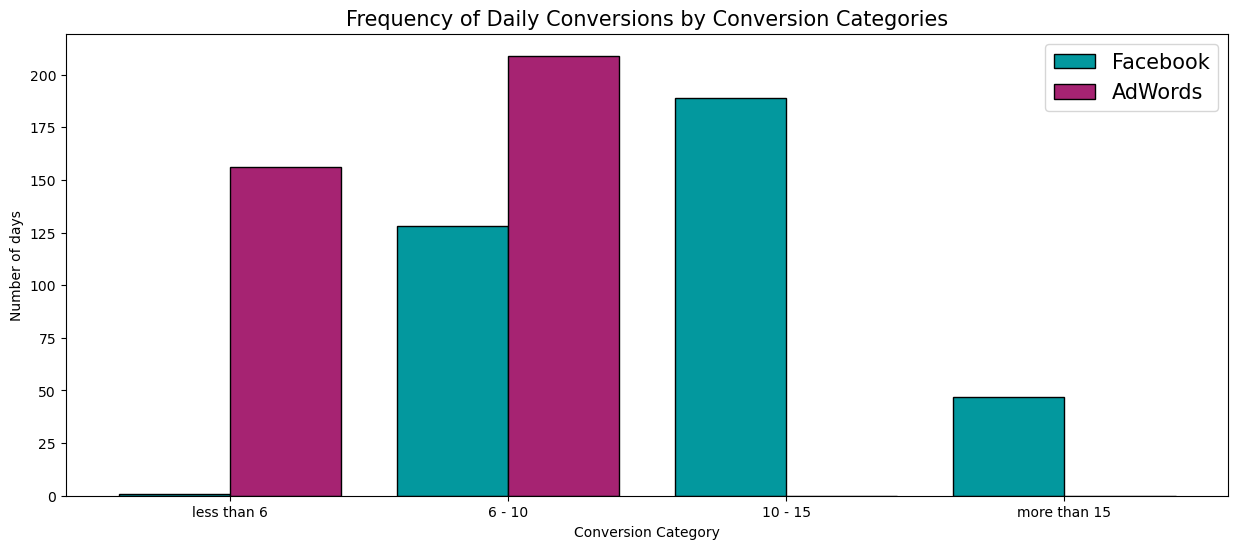

In [39]:
X_axis = np.arange(len(category_df))
plt.figure(figsize =(15,6))
plt.bar(X_axis - 0.2, category_df['Facebook'], 0.4, label='Facebook', color = '#03989E', linewidth = 1 , edgecolor = 'k')
plt.bar(X_axis + 0.2, category_df['adwords'], 0.4, label ='AdWords', color = '#A62372', linewidth = 1 , edgecolor = 'k')

plt.xticks(X_axis, category_df['Conversion Category'])
plt.xlabel('Conversion Category')
plt.ylabel('Number of days')
plt.title('Frequency of Daily Conversions by Conversion Categories', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

* The data suggests Facebook had more frequent higher conversion days than AdWords, which either had very low conversion rates (less than 6) or moderate ones (6 - 10).
* There is a significant variance in the number of high-conversion days between two different campaigns.
* The absence of any days with conversions between 10 - 15 and more than 15 in AdWords indicates a need to review what strategies were changed or what external factors could have influenced these numbers.

#### Do more clicks on ad really lead to more sales?

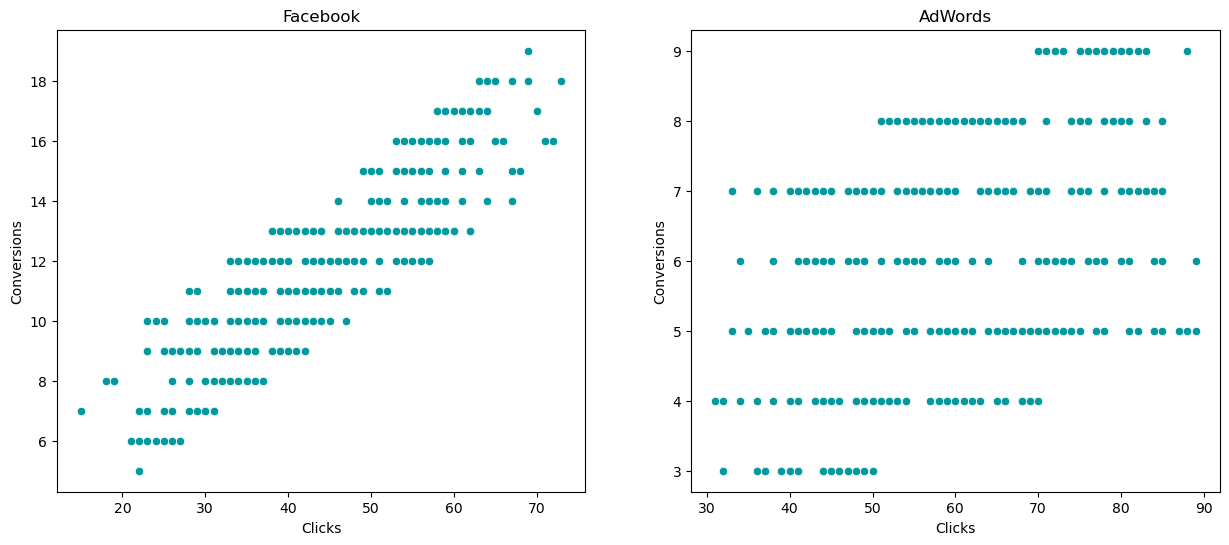

In [40]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title("Facebook")
sns.scatterplot(x =df['Facebook Ad Clicks'], y=df['Facebook Ad Conversions'], color = '#03989E')
plt.xlabel('Clicks')
plt.ylabel('Conversions')

plt.subplot(122)
plt.title("AdWords")
sns.scatterplot(x =df['AdWords Ad Clicks'], y=df['AdWords Ad Conversions'], color = '#03989E')
plt.xlabel('Clicks')
plt.ylabel('Conversions')

plt.show()

In [48]:
facebook_corr = df[['Facebook Ad Conversions','Facebook Ad Clicks']].corr().iloc[1,0]

adwords_corr = df[['AdWords Ad Conversions','AdWords Ad Clicks']].corr().iloc[1,0]

print('-'*5 + ' Correlation Coeff ' + '-'*5)
print(f"Facebook: {round(facebook_corr,2)}")
print(f"AdWords: {round(adwords_corr,2)}")

----- Correlation Coeff -----
Facebook: 0.87
AdWords: 0.45


* A correlation coefficient of 0.87 indicates a strong positive linear relationship between clicks on Facebook ads and sales. This suggests that as the number of clicks on Facebook ads increases, sales tend to increase as well.
* This strong correlation suggests that Facebook ads are highly effective in driving sales, as a large portion of thin clicks on Facebook ads.
* The strong correlation between clicks on Facebook ads and sales suggests that Facebook advertising is highly effective in driving sales for the business. Increasing investment in Facebook ads or optimizing their performance could potentially lead to even higher sa
* A correlation coefficient of 0.45 indicates a moderate positive linear relationship between clicks on AdWords ads and sales. while there is a relationship, it is not as strong as with Facebook ads.
* The moderate correlation between clicks on AdWords ads and sales indicates that while AdWords advertising does contribute to sales, its ineffectiveness maybe influenced by other factors. Further analysis is needed to identity these factors and optimize AdWords campaigns accordingly.

## Hypothesis testing

**Hypothesis:** Advertising on Facebook will result in a greater number of conversions compared to advertising on AdWords.
**Nul Hypothesis (HO):** There is no difference in the number of conversions between Facebook and AdWords, or the number of conversions from AlWords is greater than or equal to those from Facebook.

HO: mew_Facebook <=  mew_AdWords

**Alternate Hypothesis (H1):** The number of conversions from Facebook is greater than the number of conversions from AdWords.
H1: _Facebook > I AdWords

In [51]:
print('Mean Conversion \n ---------------------')
print("Facebook: ", round(df['Facebook Ad Conversions'].mean(),2))
print("AdWords: ", round(df['AdWords Ad Conversions'].mean(),2))

t_stats , p_value = st.ttest_ind(a=df['Facebook Ad Conversions'], b=df['AdWords Ad Conversions'], equal_var = False)
print('\nT statistic ', t_stats, '\np-value ', p_value)

# comparing the p value with the significance of 5% or 0.05
if p_value < 0.05:
    print("\np-value is less than significance value, Reject null hypothesis")
else:
    print("\np-value is greater than significance value, Fail to reject null hypothesis")

Mean Conversion 
 ---------------------
Facebook:  11.74
AdWords:  5.98

T statistic  32.88402060758184 
p-value  9.348918164530465e-134

p-value is less than significance value, Reject null hypothesis


* The mean number of conversions from Facebook ads (11.74) is substantially higher than the mean number of conversions from AdWords ads (5.98). This suggests that, on average, Facebook advertising is more effective in generating conversions compared to AdWords advertising.

* The T statistic (32.88) is a measure of the difference between the means of the two groups relative to the variation within the groups. A larger T statistic indicates a greater difference between the means of the two groups.

* The p-value (9.35e-134) is extremely small, indicating strong evidence against the null hypothesis.

* The results strongly support the alternate hypothesis, indicating that the number of conversions from Facebook advertising is indeed greater than the number of

* conversions from AdWords advertising. Facebook advertising appears to be a more effective channel for generating conversions compared to AdWords advertising, based on the sample data analyzed.

* Given the significant difference in conversion rates between Facebook and AdWords, consider reallocating resources towards Facebook advertising efforts. This could involve increasing ad spend, expanding targeting efforts, or experimenting with different ad formats to capitalize on the platform's effectiveness in driving conversions.

### Regression Analysis

**What will happen when we do go with Facebook Ad? How many Facebook as conversions can i expect given a certain number of facebook ad clicks**

In [52]:
# independent variable
X = df[["Facebook Ad Clicks"]]
# dependent variable
y = df[['Facebook Ad Conversions']]

# initializing and fitting Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X, y)
prediction = reg_model.predict(X)

# model evaluation
r2 = r2_score(y, prediction)*100
mse = mean_squared_error(y, prediction)
print( 'Accuracy (R2 Score) :', round(r2,2), '%')
print('Mean Squared Error:', round(mse,2)) 

Accuracy (R2 Score) : 76.35 %
Mean Squared Error: 2.02


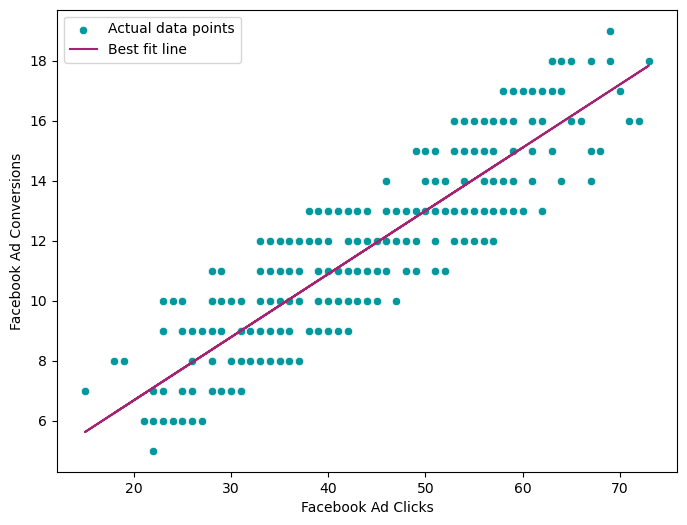

In [53]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Facebook Ad Clicks'], y=df['Facebook Ad Conversions'],color = '#03989E', label = "Actual data points")
plt.plot(df['Facebook Ad Clicks'],prediction, color = '#A62372', label = "Best fit line")
plt.legend()
plt.show()

In [55]:
print(f'For {58} Clicks, Expected Conversion: {round(reg_model.predict([[50]]) [0] [0],2)}')
print(f'For {88} Clicks, Expected Conversion: {round(reg_model.predict([[80]]) [0] [0],2)}')

For 58 Clicks, Expected Conversion: 13.0
For 88 Clicks, Expected Conversion: 19.31


C:\Users\nitin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\nitin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


* The model has a reasonably good predictive power, with an R2 score of 76.35%. This suggests that it can effectively predict Facebook ad conversions based on the number of Facebook ad clicks.

* With the insights provided by the Linear Regression model, businesses can make informed decisions about resource allocation, budget planning, and campaign optimization.

* For instance, knowing the expected number of Facebook ad conversions based on a certain number of Facebook ad clicks can help in setting realistic campaign goals, optimizing ad spend, and assessing the ROI of Facebook advertising efforts.

### Analyzing the Facebook Campaign metrics over time

In [65]:
# Cleaning data: Removing unwanted symbols and converting to numerical columns
df['Facebook Click-Through Rate (Clicks / View)'] = df['Facebook Click-Through Rate (Clicks / View)'].apply(lambda x: float(x[:-1]) if isinstance(x, str) else x)
df['Facebook Conversion Rate (Conversions / Clicks)'] = df['Facebook Conversion Rate (Conversions / Clicks)'].apply(lambda x: float(x[:-1]) if isinstance(x, str) else x)
df['Facebook Cost per Click (Ad Cost / Clicks)'] = df['Facebook Cost per Click (Ad Cost / Clicks)'].apply(lambda x: float(x[1:]) if isinstance(x, str) else x)
df['Cost per Facebook Ad'] = df['Cost per Facebook Ad'].apply(lambda x: float(x[1:]) if isinstance(x, str) else x)

In [69]:
df.dtypes

Date                                               datetime64[ns]
Facebook Ad Campaign                                       object
Facebook Ad Views                                           int64
Facebook Ad Clicks                                          int64
Facebook Ad Conversions                                     int64
Cost per Facebook Ad                                        int64
Facebook Click-Through Rate (Clicks / View)               float64
Facebook Conversion Rate (Conversions / Clicks)           float64
Facebook Cost per Click (Ad Cost / Clicks)                float64
AdWords Ad Campaign                                        object
AdWords Ad Views                                            int64
AdWords Ad Clicks                                           int64
AdWords Ad Conversions                                      int64
Cost per AdWords Ad                                         int64
AdWords Click-Through Rate (Clicks / View)                float64
AdWords Co

In [70]:
# filtering for facebook campaign
df = df[['Date', 'Facebook Ad Views',
'Facebook Ad Clicks', 'Facebook Ad Conversions', 'Cost per Facebook Ad',
'Facebook Click-Through Rate (Clicks / View)',
'Facebook Conversion Rate (Conversions / Clicks)',
'Facebook Cost per Click (Ad Cost / Clicks)']]

df.head()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks)
0,2023-01-01,2116,18,8,126,0.0083,0.4273,7.14
1,2023-01-02,3106,36,12,104,0.0115,0.3404,2.91
2,2023-01-03,3105,26,8,102,0.0084,0.3145,3.89
3,2023-01-04,1107,27,9,71,0.0245,0.3476,2.62
4,2023-01-05,1317,15,7,78,0.0110,0.4759,5.38


**At what times of the month or days of the week do we observe the conversions?**

In [71]:
# extracting month and week day from the date column
df ['month'] = df['Date' ].dt.month
df['week'] = df['Date'].dt.weekday

C:\Users\nitin\AppData\Local\Temp\ipykernel_2912\3119730816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ['month'] = df['Date' ].dt.month
C:\Users\nitin\AppData\Local\Temp\ipykernel_2912\3119730816.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week'] = df['Date'].dt.weekday


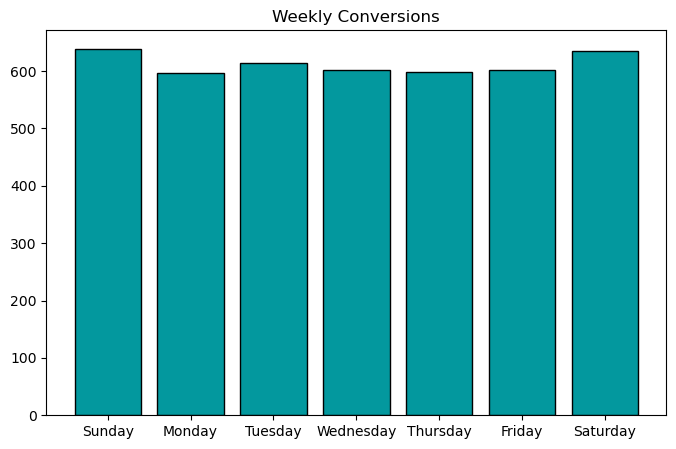

In [72]:
plt.figure(figsize=(8,5))
plt.title('Weekly Conversions')
weekly_conversion = df.groupby('week') [['Facebook Ad Conversions'] ].sum()
week_names= ['Sunday', 'Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday' ]
plt.bar(week_names, weekly_conversion ['Facebook Ad Conversions'], color = '#03989E', edgecolor = 'k' )
plt.show()

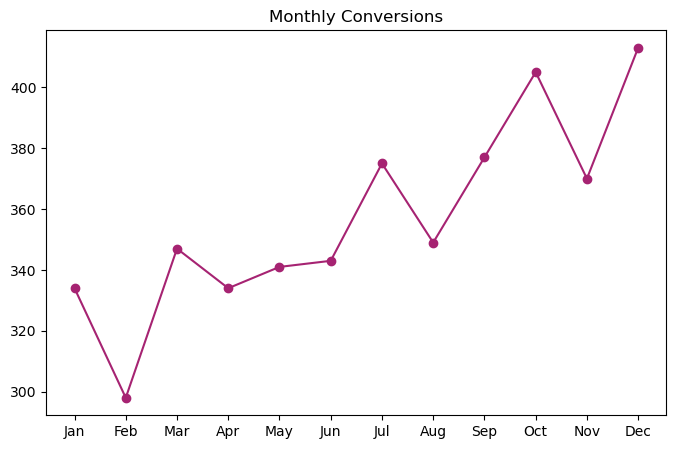

In [73]:
plt.figure(figsize=(8,5))
plt.title('Monthly Conversions' )
monthly_conversion = df.groupby( 'month' ) [[ 'Facebook Ad Conversions' ]].sum( )
month_names = ['Jan','Feb','Mar','Apr', 'May', 'Jun' , 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec' ]
plt.plot(month_names, monthly_conversion['Facebook Ad Conversions'],'-o', color = '#A62372')
plt.show()

* Across the weekdays over a year, the total number of conversions remains relatively consistent, indicating a consistent level of engagement throughout the week. However, Mondays and Tuesdays consistently exhibit the highest conversion rates compared to other days, suggesting that the beginning of the workweek sees heightened user engagement or responsiveness to marketing efforts.
* Examining the monthly trend in conversions reveals an overall upward trajectory, indicating a general increase in conversions over time. However, certain months stand out with variations in conversion rates. February, April, May, June, August, and November experience a decline in conversions compared to neighboring months. These periods of decreased conversion rates could be influenced by factors such as seasonal fluctuations, changes in consumer behavior, or adjustments in marketing strategies.


#### How does the Cost Per Conversion (CPC) trend over time?
Cost Per Conversion (CPC): This metric is used to evaluate the cost effectiveness and profitability of an online advertising campaign. This metric helps marketers
understand how much they are spending to obtain each conversion, allowing them to optimize their spending and targeting strategies effectively.

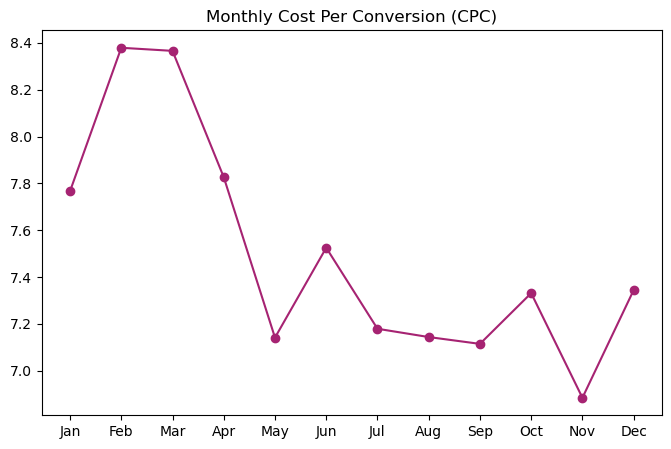

In [78]:
plt.figure(figsize=(8,5))
plt.title('Monthly Cost Per Conversion (CPC)')
monthly_df = df.groupby( 'month' ) [ ['Facebook Ad Conversions', 'Cost per Facebook Ad']].sum( )
monthly_df ['Cost per Conversion' ] = monthly_df ['Cost per Facebook Ad' ]/monthly_df ['Facebook Ad Conversions' ]
plt.plot(month_names, monthly_df ['Cost per Conversion'],'-o', color = '#A62372')
plt.show()

* The CPC trend over the 12-month period shows some fluctuations but overall maintains a relatively stable range.
* May and November have the lowest CPC values, indicating potertially more cost-effective advertising or higher conversion rates during these periods.
* February has the highest CPC value, suggesting that advertising costs may be relatively higher during this month compared to others.
* Lower CPC values in certain months (e.g., May and November) could indicate periods of higher advertising effectiveness or more favorable market corditions.
* Consider allccating more advertising budget to months with historically lower CPC values (e.g., May and November) to maximize ROI.

#### Is there a long-term equilibrium relationship between advertising spend and conversion rates that suggests a stable, proportional impact of budget changes on conversions over time?

In [82]:
score, p_value, _ = coint(df['Cost per Facebook Ad'], df["Facebook Ad Conversions"] )
print('Cointegration test scoife:', score)
print('P-value:', p_value)
if p_value < 0.05:
    print("\np-value is less than significance value, Reject the null hypothesis")
else:
    print("\np-value is greater than significance value, Accept the null hypothesis")

Cointegration test scoife: -14.755428385103224
P-value: 2.1337375979060563e-26

p-value is less than significance value, Reject the null hypothesis


* Since the p-value is significantly lower than the chosen sigrificance level, we reject the null hypothesis. This indicates that there is a long-term equilibrium relationship between advertising spend (cost) and conversions.

* Businesses can use this understanding of the stable relationship betwaen cost and cenversions to optimize their advertising strategies. By investing in campaigns that demonstrate a strong return on investment (ROl) and adjusting spending based on performance, companies can maximize conversions while minimizing costs.